# Detección anomalías
 
Nivel 4 (destacado) 
- Aplica algoritmos para detectar anomalías, tanto a nivel de atributo como de instancia, 
- con muy buenos resultados.
3 puntos

In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
import pandas as pd

In [2]:
datos = pd.read_csv("CTG_PREPROCESS.csv")

In [3]:
# Eliminar columnas no numéricas o convertirlas si es necesario
datos_numericos = datos.select_dtypes(include=['float64', 'int64'])

# Detección de anomalías a nivel de atributo
# Isolation Forest
modelo_IF = IsolationForest(contamination=0.1)  # Ajustar el nivel de contaminación según sea necesario
anomalias_IF = modelo_IF.fit_predict(datos_numericos)

# Local Outlier Factor (LOF)
modelo_LOF = LocalOutlierFactor(n_neighbors=20)  # Ajustar el número de vecinos según sea necesario
anomalias_LOF = modelo_LOF.fit_predict(datos_numericos)

# Detección de anomalías a nivel de instancia
# One-Class SVM
modelo_OCSVM = OneClassSVM(nu=0.1)  # Ajustar el parámetro nu según sea necesario
anomalias_OCSVM = modelo_OCSVM.fit_predict(datos_numericos)

# Minimum Covariance Determinant (MCD)
modelo_MCD = EllipticEnvelope(contamination=0.1)  # Ajustar el nivel de contaminación según sea necesario
anomalias_MCD = modelo_MCD.fit_predict(datos_numericos)

# DBSCAN
modelo_DBSCAN = DBSCAN(eps=0.5, min_samples=5)  # Ajustar los parámetros eps y min_samples según sea necesario
anomalias_DBSCAN = modelo_DBSCAN.fit_predict(datos_numericos)

/Users/davidcanaca/anaconda3/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [4]:

# Imprimir resultados de Isolation Forest
print("Isolation Forest:")
print(anomalias_IF)

# Imprimir resultados de Local Outlier Factor (LOF)
print("\nLocal Outlier Factor (LOF):")
print(anomalias_LOF)

# Imprimir resultados de One-Class SVM
print("\nOne-Class SVM:")
print(anomalias_OCSVM)

# Imprimir resultados de Minimum Covariance Determinant (MCD)
print("\nMinimum Covariance Determinant (MCD):")
print(anomalias_MCD)

# Imprimir resultados de DBSCAN
print("\nDBSCAN:")
print(anomalias_DBSCAN)


Isolation Forest:
[1 1 1 ... 1 1 1]

Local Outlier Factor (LOF):
[-1  1  1 ...  1 -1  1]

One-Class SVM:
[-1  1  1 ...  1 -1  1]

Minimum Covariance Determinant (MCD):
[-1  1  1 ...  1  1  1]

DBSCAN:
[-1 -1 -1 ... -1 -1 -1]


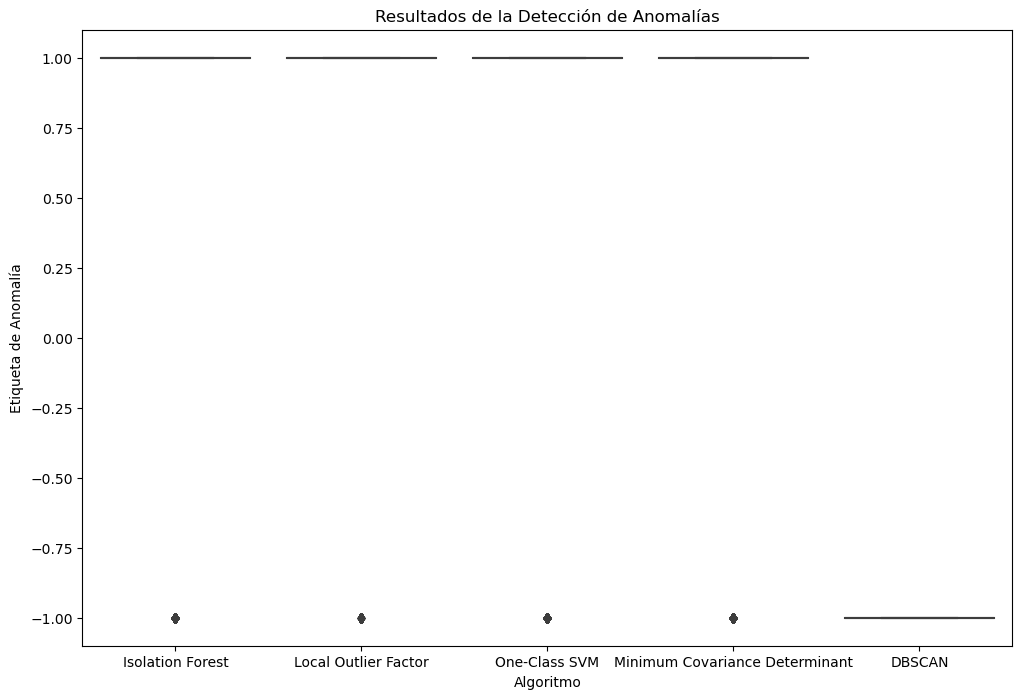

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los resultados de la detección de anomalías
resultados = pd.DataFrame({
    "Isolation Forest": anomalias_IF,
    "Local Outlier Factor": anomalias_LOF,
    "One-Class SVM": anomalias_OCSVM,
    "Minimum Covariance Determinant": anomalias_MCD,
    "DBSCAN": anomalias_DBSCAN
})

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Graficar los resultados
sns.boxplot(data=resultados)
plt.title("Resultados de la Detección de Anomalías")
plt.xlabel("Algoritmo")
plt.ylabel("Etiqueta de Anomalía")
plt.show()
